In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import StandardScaler


In [272]:
df = pd.read_csv("../data/heart_disease_selected.csv")

In [273]:
X = df.drop(columns=['target'])
y = df["target"]  #for test

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [274]:
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

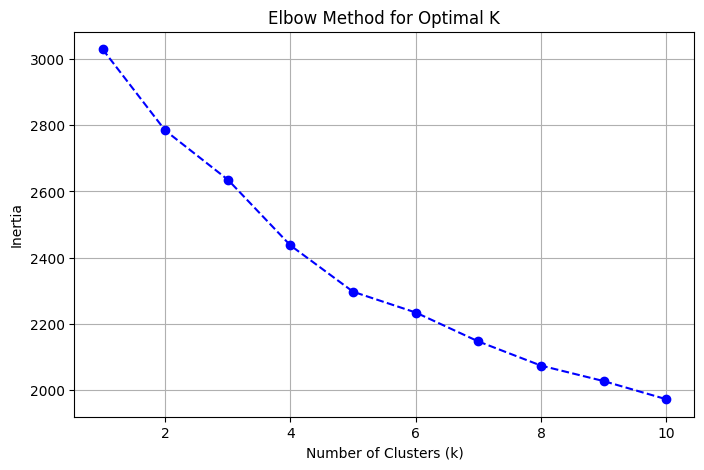

In [275]:
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [276]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels


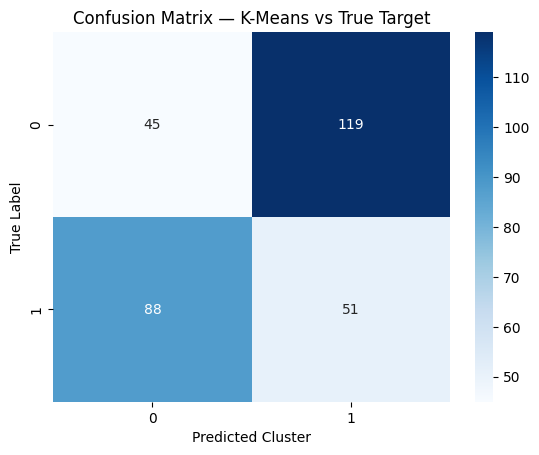

In [277]:
cm_kmeans = confusion_matrix(y, kmeans_labels)
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — K-Means vs True Target")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.show()


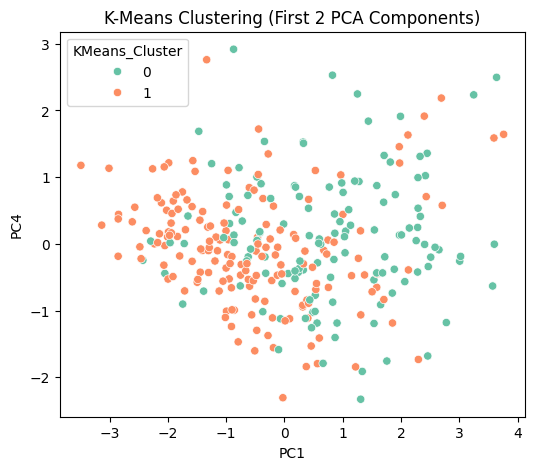

In [278]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1],
                hue=df['KMeans_Cluster'], palette='Set2')
plt.title("K-Means Clustering (First 2 PCA Components)")
plt.show()

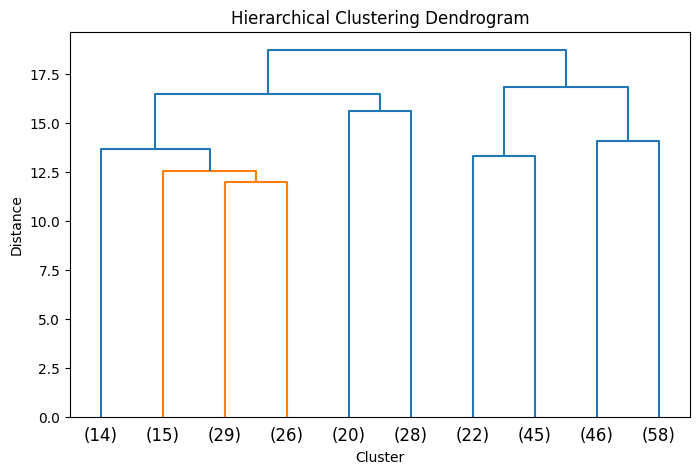

In [279]:
plt.figure(figsize=(8, 5))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()


In [280]:
hc = AgglomerativeClustering(n_clusters=2 , linkage = 'ward')
hc_labels = hc.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = hc_labels


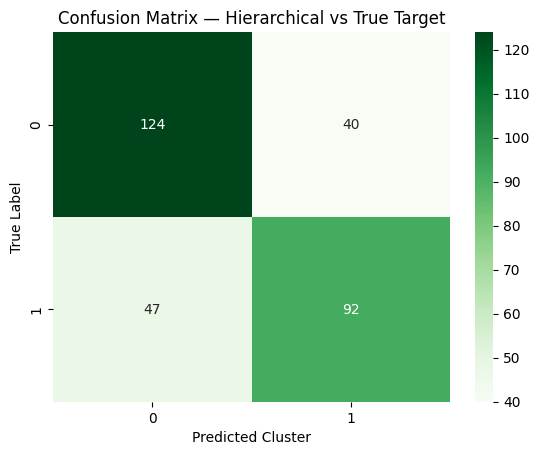

In [281]:
cm_agg = confusion_matrix(y, hc_labels)
sns.heatmap(cm_agg, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix — Hierarchical vs True Target")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.show()


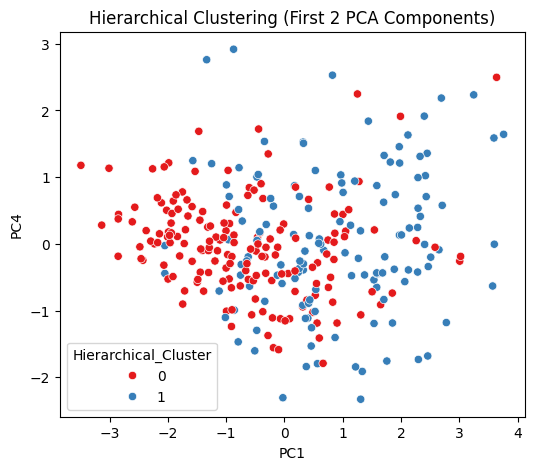

In [282]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1],
                hue=df['Hierarchical_Cluster'], palette='Set1')
plt.title("Hierarchical Clustering (First 2 PCA Components)")
plt.show()